## Problem Statement

● A sizable department has to be maintained, for the purposes of recruiting new talent.

● More often than not, the new employees have to be trained for the job and/or given time to acclimatize themselves to the company.

● Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition.

● In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay.

● Also, they want to know which of these variables is most important and needs to be addressed right away.

# importing required libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv("general_data.csv")
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


# Data Cleaning

## Checking for null values in the datas

In [3]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [4]:
data.mean()

Age                           36.923810
DistanceFromHome               9.192517
Education                      2.912925
EmployeeCount                  1.000000
EmployeeID                  2205.500000
JobLevel                       2.063946
MonthlyIncome              65029.312925
NumCompaniesWorked             2.694830
PercentSalaryHike             15.209524
StandardHours                  8.000000
StockOptionLevel               0.793878
TotalWorkingYears             11.279936
TrainingTimesLastYear          2.799320
YearsAtCompany                 7.008163
YearsSinceLastPromotion        2.187755
YearsWithCurrManager           4.123129
dtype: float64

In [5]:
# filling up null values with their mean
data['NumCompaniesWorked'] = data['NumCompaniesWorked'].fillna(2.69) 
data['TotalWorkingYears'] = data['TotalWorkingYears'].fillna(11.28)
# checking if it is filled
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [6]:
#encoding categorical/string values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Department'] = le.fit_transform(data['Department'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['JobRole'] = le.fit_transform(data['JobRole'])

data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.00,Y,11,8,0,1.00,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.00,Y,23,8,1,6.00,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.00,Y,15,8,3,5.00,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.00,Y,11,8,3,13.00,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.00,Y,12,8,2,9.00,2,6,0,4
5,46,0,2,1,8,3,1,1,6,0,...,3.00,Y,13,8,0,28.00,5,7,7,7
6,28,1,2,1,11,2,3,1,7,1,...,2.00,Y,20,8,1,5.00,2,0,0,0
7,29,0,2,1,18,3,1,1,8,1,...,2.00,Y,22,8,3,10.00,2,0,0,0
8,31,0,2,1,1,3,1,1,9,1,...,0.00,Y,21,8,0,10.00,2,9,7,8
9,25,0,0,1,7,4,3,1,10,0,...,1.00,Y,13,8,1,6.00,2,6,1,5


In [7]:
#making a new dataframe with the columns to work on
data1 = data[['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','Gender', 'MaritalStatus',
       'JobLevel', 'JobRole', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
#making variables to store Attrition values
data_yes = data1[data1['Attrition']==1]
data_no = data1[data1['Attrition']==0]
cols = list(data1.columns)

# Univariate Analysis

## Calculating statistical values

In [8]:
data[['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','Gender', 'MaritalStatus',
       'JobLevel', 'JobRole', 'MonthlyIncome',
       'NumCompaniesWorked','PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,0.161224,1.607483,1.260544,9.192517,2.912925,2.247619,0.600000,1.097279,2.063946,4.458503,65029.312925,2.694810,15.209524,11.279937,2.799320,7.008163,2.187755,4.123129
std,9.133301,0.367780,0.665304,0.527673,8.105026,1.023933,1.331067,0.489954,0.729955,1.106689,2.461263,47068.888559,2.493497,3.659108,7.774275,1.288978,6.125135,3.221699,3.567327
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,1.000000,7.000000,3.000000,2.000000,1.000000,1.000000,2.000000,5.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,2.000000,14.000000,4.000000,3.000000,1.000000,2.000000,3.000000,7.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,1.000000,2.000000,5.000000,8.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


## Mode

In [9]:
data_mode = data1.mode()
data_mode

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,0,2,1,2,3,1,1,1,1,7,23420,1.0,11,10.0,2,5,0,2


## Median

In [10]:
data_median = pd.DataFrame(data1.median(), columns = ['Median'])
data_median

,Median
Age,36.0
Attrition,0.0
BusinessTravel,2.0
Department,1.0
DistanceFromHome,7.0
Education,3.0
EducationField,2.0
Gender,1.0
MaritalStatus,1.0
JobLevel,2.0


## Variance

In [11]:
data_variance = pd.DataFrame(data1.var(), columns = ['Variance'])
data_variance

,Variance
Age,8.341719e+01
Attrition,1.352618e-01
BusinessTravel,4.426294e-01
Department,2.784384e-01
DistanceFromHome,6.569144e+01
Education,1.048438e+00
EducationField,1.771740e+00
Gender,2.400544e-01
MaritalStatus,5.328345e-01
JobLevel,1.224760e+00


## Skewness

In [71]:
# Finding out the skewness
data_skew = pd.DataFrame(data1.skew(), columns = ['Skewness'])
data_skew

,Skewness
Age,0.413005
Attrition,1.843111
BusinessTravel,-1.438026
Department,0.172114
DistanceFromHome,0.957466
Education,-0.289484
EducationField,0.549997
Gender,-0.408387
MaritalStatus,-0.152071
JobLevel,1.024703


## Kurtosis

In [13]:
# Finding out the Kurtosis
data_kurt = pd.DataFrame(data1.kurt(), columns = ['Kurtosis'])
data_kurt

,Kurtosis
Age,-0.405951
Attrition,1.397690
BusinessTravel,0.698371
Department,-0.393269
DistanceFromHome,-0.227045
Education,-0.560569
EducationField,-0.689242
Gender,-1.834052
MaritalStatus,-1.115231
JobLevel,0.395525


# Visualization

## Boxplot

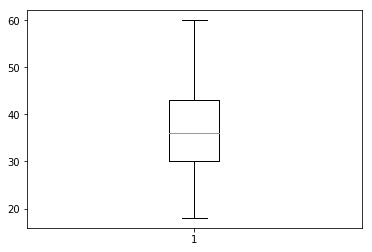

In [16]:
plt.boxplot(data.Age)
plt.show()

Inference:- It can be clearly seen that the Age data is approximately normally distributed with no outliers.

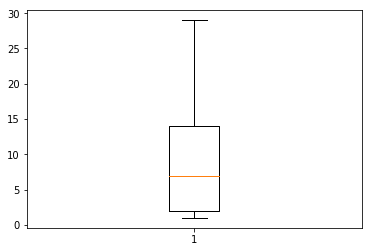

In [17]:
plt.boxplot(data.DistanceFromHome)
plt.show()

Inference:- It can be clearly seen that the DistanceFromHome data is not normally distributed and has no outliers.

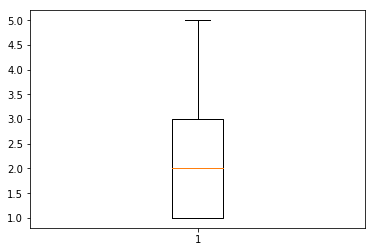

In [18]:
plt.boxplot(data.JobLevel)
plt.show()

Inference:- It can be clearly seen that the JobLevel data is not normally distributed and has no outliers.

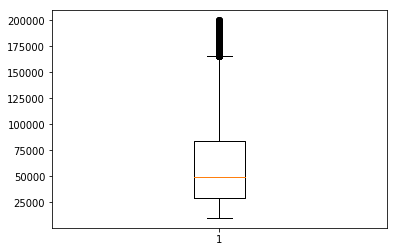

In [19]:
plt.boxplot(data.MonthlyIncome)
plt.show()

Inference:- It can be clearly seen that the MonthlyIncome data is not normally distributed and has multiple outliers.

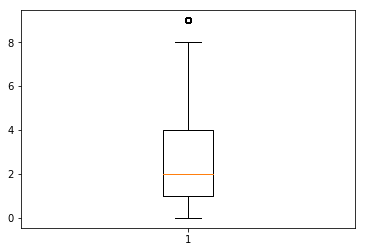

In [20]:
plt.boxplot(data.NumCompaniesWorked)
plt.show()

Inference:- It can be clearly seen that the NumCompaniesWorked data is not normally distributed and has a single outlier.

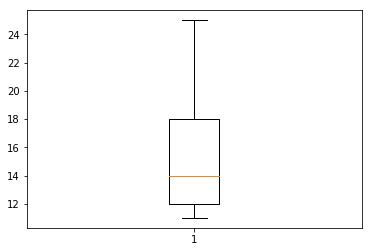

In [21]:
plt.boxplot(data.PercentSalaryHike)
plt.show()

Inference:- It can be clearly seen that the PercentSalaryHike data is not normally distributed and has no outlier.

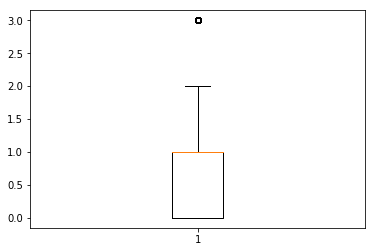

In [22]:

plt.boxplot(data.StockOptionLevel)
plt.show()

Inference:- 
It can be clearly seen that the StockOptionLevel data is not normally distributed and has a single outlier.

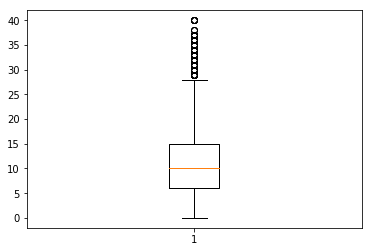

In [23]:
plt.boxplot(data.TotalWorkingYears)
plt.show()

Inference:-
It can be clearly seen that the TotalWorkingYears data is approximately normally distributed and has multiple outliers.

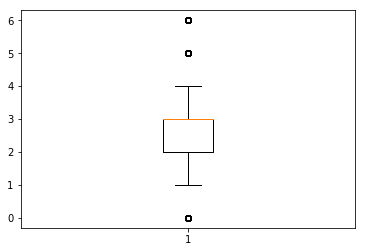

In [24]:
plt.boxplot(data.TrainingTimesLastYear)
plt.show()

Inference:- 
It can be clearly seen that the TrainingTimesLastYear data is not normally distributed and has few outliers.

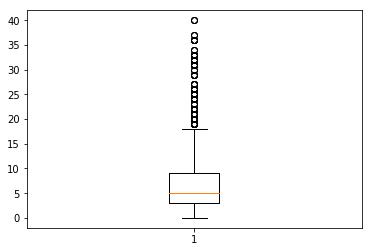

In [25]:

plt.boxplot(data.YearsAtCompany)
plt.show()

Inference:- It can be clearly seen that the YearsAtCompany data is not normally distributed and has multiple outliers.

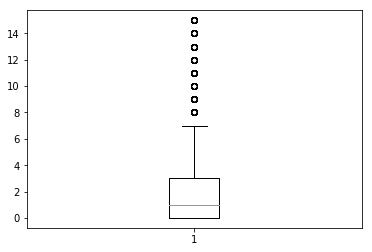

In [26]:
plt.boxplot(data.YearsSinceLastPromotion)
plt.show()

Inference:- 
It can be clearly seen that the YearsSinceLastPromotion data is not normally distributed and has multiple outliers.


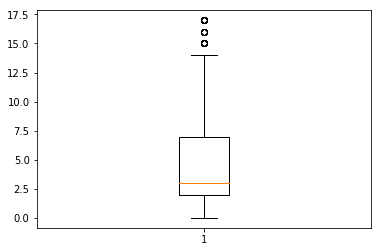

In [27]:
plt.boxplot(data.YearsWithCurrManager)
plt.show()

Inference:- 
It can be clearly seen that the YearsWithCurrManager data is not normally distributed and has few outliers.

## Histogram

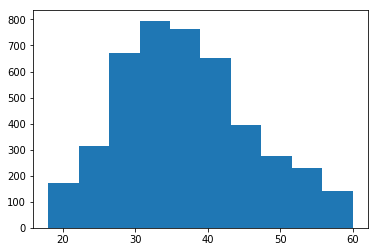

In [28]:
plt.hist(data.Age)
plt.show()

Inference:- 
Age data is symmetric and has it's peak almost at the middle(Mesokurtic).

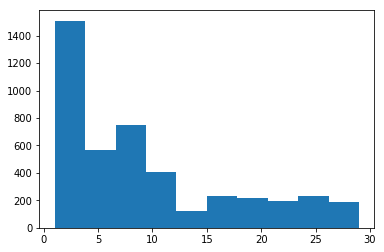

In [29]:
plt.hist(data.DistanceFromHome)
plt.show()

Inference:- 
DistanceFromHome data is unsymmetric and has it's peak at the left side (positively skewed).

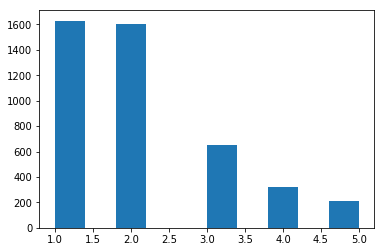

In [30]:
plt.hist(data.JobLevel)
plt.show()

Inference:- 
JobLevel data is unsymmetric and has it's peak at the left side (positively skewed).

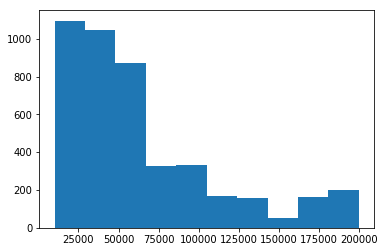

In [31]:

plt.hist(data.MonthlyIncome)
plt.show()

Inference:- 
MonthlyIncome data is unsymmetric and has it's peak at the left side (positively skewed).

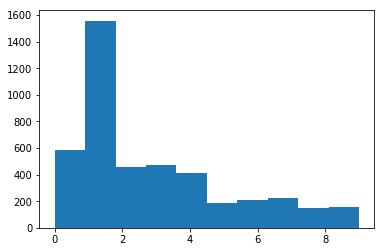

In [32]:
plt.hist(data.NumCompaniesWorked)
plt.show()

Inference:- 
NumCompaniesWorked data is unsymmetric and has it's peak at the left side (positively skewed).

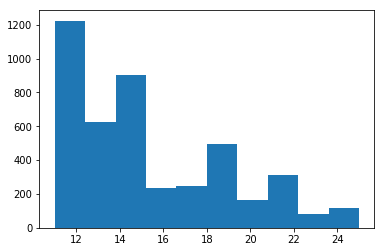

In [72]:
plt.hist(data.PercentSalaryHike)
plt.show()

Inference:- 
PercentSalaryHike data is unsymmetric and has it's peak at the left side (positively skewed).

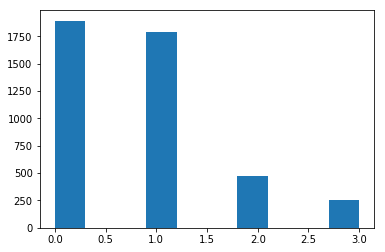

In [34]:
plt.hist(data.StockOptionLevel)
plt.show()

Inference:- 
StockOptionLevel data is unsymmetric and has it's peak at the left side (positively skewed).

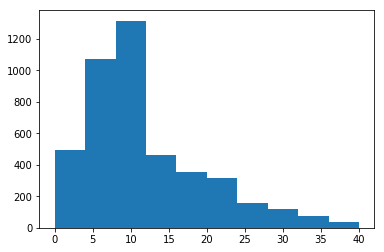

In [35]:
plt.hist(data.TotalWorkingYears)
plt.show()

Inference:- 
TotalWorkingYears data is unsymmetric and has it's peak at the left side (positively skewed).

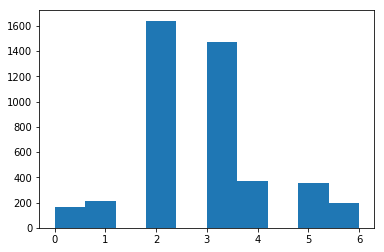

In [36]:

plt.hist(data.TrainingTimesLastYear)
plt.show()

Inference:- 
TrainingTimesLastYear data is approximaately symmetric and has it's peak almost at the middle(Mesokurtic).

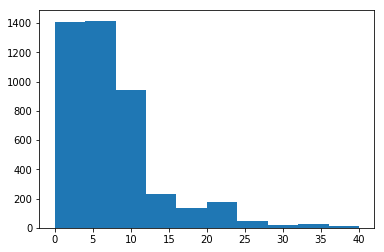

In [37]:
plt.hist(data.YearsAtCompany)
plt.show()

Inference:- YearsAtCompany data is unsymmetric and has it's peak at the left side (positively skewed).

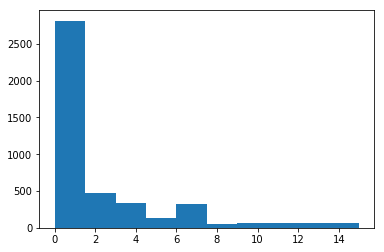

In [38]:
plt.hist(data.YearsSinceLastPromotion)
plt.show()

Inference:- 
YearsSinceLastPromotion data is unsymmetric and has it's peak at the left side (positively skewed).

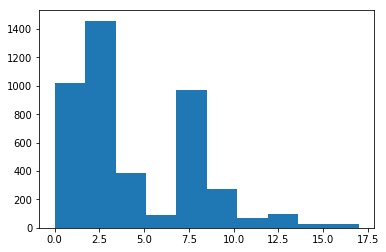

In [39]:
plt.hist(data.YearsWithCurrManager)
plt.show()

Inference:- 
YearsWithCurrManager data is unsymmetric and has it's peak at the left side (positively skewed).

# Statistical Tests (Mann-Whitney)

In [41]:
import pandas as pd
data=pd.read_csv('general_data.csv')
dummy=pd.get_dummies(data['Attrition'])
df2=pd.concat((data,dummy),axis=1)
df2=df2.drop(['Attrition'],axis=1)
df2=df2.drop(['No'],axis=1)
df2=df2.rename(columns={"Yes":"Attrition"})
df2.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,Y,11,8,0,1.0,6,1,0,0,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,Y,23,8,1,6.0,3,5,1,4,1
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,Y,15,8,3,5.0,2,5,0,3,0
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,Y,11,8,3,13.0,5,8,7,5,0
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,Y,12,8,2,9.0,2,6,0,4,0


## ATTRITION VS  DISTANCE FROM HOME.

H0 = There is no significant difference between attrition yes and no for distance from home

HA= There is  significant difference between attrition yes and no for distance from home 


In [42]:
from scipy.stats import mannwhitneyu
stats,p=mannwhitneyu(df2.Attrition,df2.DistanceFromHome)
print(stats,p)

221832.0 0.0


As the P value of 0.0 is < 0.05, the H0 is rejected and HA is accepted.
So there is difference in attrition and distance from home.


## ATTRITION VS TOTAL WORKING YEARS

H0 = There is no significant difference between attrition yes and no for total working years.

HA= There is  significant difference between attrition yes and no for total working years.


In [43]:
stats,p=mannwhitneyu(df2.Attrition,df2.TotalWorkingYears)
print(stats,p)

170527.5 0.0


As the P value of 0.0 is < 0.05, the H0 is rejected and Ha is accepted.
So there significant is difference in attrition and total working years.


## ATTRITION VS YEARS AT COMPANY

H0 = There is no significant difference between attrition yes and no for years at company.

HA= There is  significant difference between attrition yes and no for years at company.


In [44]:
stats,p=mannwhitneyu(df2.Attrition,df2.YearsAtCompany)
print(stats,p)


520357.5 0.0


As the P value of 0.0 is < 0.05, the H0 is rejected and Ha is accepted.So there is difference in attrition and years at company.

## ATTRITION VS YEARS WITH CURRENT MANAGER

H0 = There is no significant difference between attrition yes and no for years with current manager.

HA= There is  significant difference between attrition yes and no for years with current manager.


In [45]:
stats,p=mannwhitneyu(df2.Attrition,df2.YearsWithCurrManager)
print(stats,p)


2101288.5 0.0


As the P value of 0.0 is < 0.05, the H0 is rejected and HA is accepted.
So there is difference in attrition and years with current manager.


# Statistical Tests (Separate T Test)

In [58]:
from scipy.stats import ttest_ind
stat, p=ttest_ind(df2.Attrition,df2.DistanceFromHome)
print(stats,p)

-0.156199315902 0.0


As the P value is again 0.0, which is < than 0.05, the H0 is rejected and ha is accepted.

H0: There is no significant differences in the Distance From Home between attrition (Y) and attirition
(N)

Ha: There is significant differences in the Distance From Home between attrition (Y) and attirition (N)

In [59]:
from scipy.stats import ttest_ind
stat, p=ttest_ind(df2.Attrition,df2.YearsAtCompany)
print(stats,p)

-0.156199315902 0.0


As the P value is again 0.0, which is < than 0.05, the H0 is rejected and ha is accepted.

H0: There is no significant differences in the Years At Company between attrition (Y) and attirition(N)

Ha: There is significant differences in the Years At Company between attrition (Y) and attirition (N)

# Correlation Analysis

## CORRELATION BETWEEN ATTRITION AND AGE

-0.159205006866 1.99680161588e-26
NEGETIVE CORRELATION


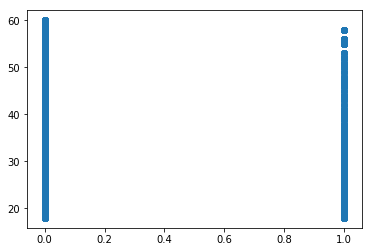

In [48]:
from scipy.stats import pearsonr
stats,p=pearsonr(df2.Attrition,df2.Age)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
import matplotlib.pyplot as plt
plt.scatter(df2.Attrition,df2.Age)
plt.show()

It is low negative correlation.

H0 = There is no significant difference between attrition and age. 

HA = There is significant difference between attrition and age.

 As p value less than .05 so null hypothesis is rejected , so there is significant difference between attrition and age.



## CORRELATION BETWEEN ATTRITION AND YEARS AT COMPANY


-0.13439221399 3.16388312248e-19
NEGETIVE CORRELATION


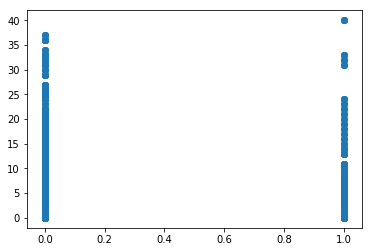

In [49]:
stats,p=pearsonr(df2.Attrition,df2.YearsAtCompany)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(df2.Attrition,df2.YearsAtCompany)
plt.show()

It is low negative correlation. 

H0 = There is no significant difference between attrition and years at company. 

HA = There is significant difference between attrition and years at company.

As p value less than .05 so null hypothesis is rejected . so there is significant difference between attrition and years at company.


## CORRELATION BETWEEN ATTRITION AND YEARS SINCE LAST PROMOTION

-0.0330187751426 0.0283303361894
NEGETIVE CORRELATION


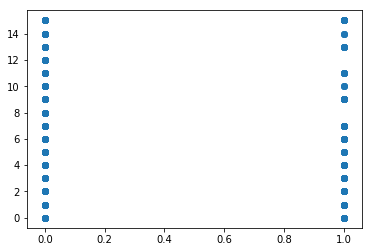

In [50]:
stats,p=pearsonr(df2.Attrition,df2.YearsSinceLastPromotion)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(df2.Attrition,df2.YearsSinceLastPromotion)
plt.show()

It is low negative correlation. 

H0 = There is no significant difference between attrition and years since last promotion.

HA = There is significant difference between attrition and years since last promotion.
 
As p value less than .05 so null hypothesis is rejected , so there is significant difference between attrition and years since last promotion.


## CORRELATION BETWEEN ATTRITION AND TRAINING TIMES LAST YEAR

-0.0494305762443 0.00102470619153
NEGETIVE CORRELATION


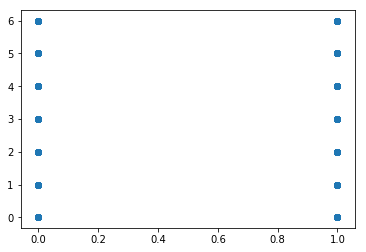

In [51]:
stats,p=pearsonr(df2.Attrition,df2.TrainingTimesLastYear)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(df2.Attrition,df2.TrainingTimesLastYear)
plt.show()


It is low negative correlation. 

H0 = There is no significant difference between attrition and training times last year.

HA = There is significant difference between attrition and training times last year. 
 
As p value less than .05 so null hypothesis is rejected , so there is significant difference between attrition and training times last year.


## CORRELATION BETWEEN ATTRITION AND STOCK OPTION LEVEL

-0.00683885240326 0.649807293749
NEGETIVE CORRELATION


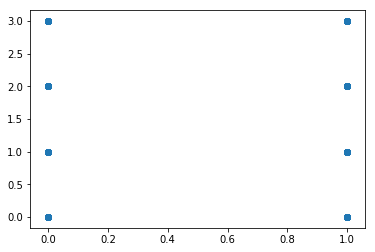

In [52]:
stats,p=pearsonr(df2.Attrition,df2.StockOptionLevel)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(df2.Attrition,df2.StockOptionLevel)
plt.show()

It is low negative correlation. 

H0 = There is no significant difference between attrition and stock option level. 

HA = There is significant difference between attrition and stock option level. 

As p value more than .05 so null hypothesis is accepted , so there is no significant difference between attrition and stock option level.


## CORRELATION BETWEEN ATTRITION AND PERCENTAGE SALARY HIKE

0.0325325948911 0.0307433864333
POSITIVE CORRELATION


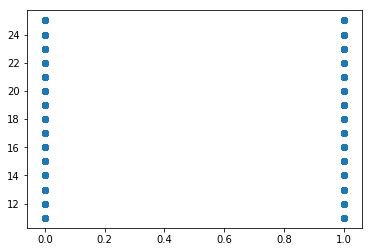

In [53]:
stats,p=pearsonr(df2.Attrition,df2.PercentSalaryHike)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(df2.Attrition,df2.PercentSalaryHike)
plt.show()

It is low positive correlation.

H0 = There is no significant difference between attrition and percent salary hike. 

HA = There is significant difference between attrition and percent salary hike. 

As p value less than .05 so null hypothesis is rejected , so there there is significant difference between attrition and percent salary hike


## CORRELATION BETWEEN ATTRITION AND JOB LEVEL

-0.0102897132875 0.49451717272
NEGETIVE CORRELATION


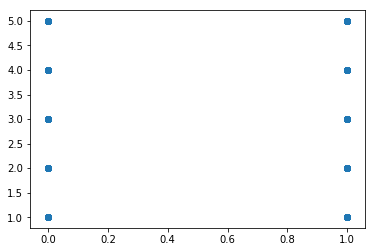

In [54]:
stats,p=pearsonr(df2.Attrition,df2.JobLevel)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(df2.Attrition,df2.JobLevel)
plt.show()

It is low negative correlation. 

H0 = There is no significant difference between attrition and job level. 

HA = There is significant difference between attrition and job level. 

As p value more than .05 so null hypothesis is accepted , so there there is no significant difference between attrition and job level


## CORRELATION BETWEEN ATTRITIONA ND DISTANCE FROM HOME

-0.00973014101018 0.518286042807
NEGETIVE CORRELATION


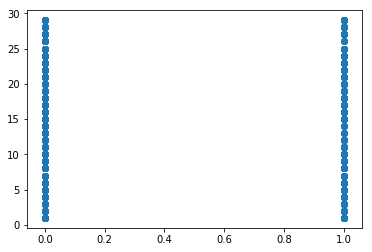

In [55]:
stats,p=pearsonr(df2.Attrition,df2.DistanceFromHome)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(df2.Attrition,df2.DistanceFromHome)
plt.show()

It is low negative correlation.

H0 = There is no significant difference between attrition and distance from home. 

HA = There is significant difference between attrition and distance from home.

As p value more than .05 so null hypothesis is accepted , so there  is no significant difference between attrition and distance from home.


## CORRELATION BETWEEN ATTRITION AND EDUCATION

-0.015111167711 0.315729317712
NEGETIVE CORRELATION


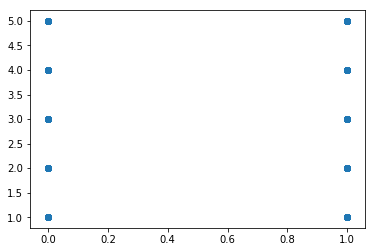

In [56]:
stats,p=pearsonr(df2.Attrition,df2.Education)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(df2.Attrition,df2.Education)
plt.show()

It is low negative correlation. 

H0 = There is no significant difference between attrition and education. 

HA = There is significant difference between attrition and education.

As p value more than .05 so null hypothesis is accepted , so there  is no significant difference between attrition and education.


## CORRELATION BETWEEN ATTRTION AND YEARS WITH CURRENT MANAGER

-0.156199315902 1.73393226529e-25
NEGETIVE CORRELATION


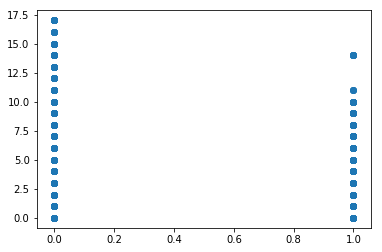

In [57]:
stats,p=pearsonr(df2.Attrition,df2.YearsWithCurrManager)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(df2.Attrition,df2.YearsWithCurrManager)
plt.show()

It is low negative correlation.

H0 = There is no significant difference between attrition and years with current manager. 

HA = There is significant difference between attrition and years with current manager. 

As p value less than .05 so null hypothesis is rejected , so there  is significant difference between attrition and years with current manager.
